In [1]:
!pip install google-play-scraper
!pip install emoji
!pip install nltk
!pip install Sastrawi

# Import library
from google_play_scraper import reviews, Sort
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import emoji
import html
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 18.1 MB/s eta 0:00:00


In [2]:
nltk.download('punkt')
nltk.download('stopwords')
import nltk
nltk.download('punkt_tab')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

## Import

In [3]:
pip install google-play-scraper

In [4]:
from google_play_scraper import reviews, Sort

In [5]:
review_game, _ = reviews(
    'com.roblox.client',
    lang='id',
    country='id',
    sort = Sort.NEWEST,
    count=10000
)


# Exploratoy Data Analysis


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
roblox_df = pd.DataFrame(review_game)

In [8]:
roblox_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              10000 non-null  object        
 1   userName              10000 non-null  object        
 2   userImage             10000 non-null  object        
 3   content               9998 non-null   object        
 4   score                 10000 non-null  int64         
 5   thumbsUpCount         10000 non-null  int64         
 6   reviewCreatedVersion  7307 non-null   object        
 7   at                    10000 non-null  datetime64[ns]
 8   replyContent          0 non-null      object        
 9   repliedAt             0 non-null      object        
 10  appVersion            7307 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 859.5+ KB


In [9]:
roblox_df = roblox_df.drop(roblox_df.columns[[0,1,2,4,5,6,7,8,9,10]], axis=1)

In [10]:
roblox_df.sample(n=10)

,content
566,sangat seru😁
3,game bagus bagusss banget terlalu bagus sumpah...
1513,gamenya bagus tapi setiap mau masuk suka tiba ...
3678,ini hari Senin tanggal 20 tahun 2025 bulan Okt...
2976,game nya seru
6238,karena kurang cewek
7517,game lag banyak bug
7448,bagus tapi sedikit nge lag
9060,mancing gilaaaa... mantaap
4563,jandel gw benci lu


In [41]:
print('duplikasi', roblox_df.duplicated().sum())

TypeError: unhashable type: 'dict'

# Preprocessing

In [12]:
pip install emoji

In [13]:
import re
import emoji
import html
import string

In [14]:
# Daftar slang words (tambahkan sesuai kebutuhan)
slangwords = {
    "@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar",
    "bgt": "banget", "maks": "maksimal", "bgtt": "banget", "bngt": "banget", "bgtu": "begitu",
    "tp": "tapi", "dg": "dengan", "dgn": "dengan", "dlm": "dalam", "utk": "untuk", "yg": "yang",
    "gk": "tidak", "gak": "tidak", "ga": "tidak", "nggak": "tidak", "ngga": "tidak", "nggaknya": "tidaknya",
    "dr": "dari", "kalo": "kalau", "kl": "kalau", "klo": "kalau", "sm": "sama", "sama2": "sama-sama",
    "tdk": "tidak", "blm": "belum", "sdh": "sudah", "udh": "sudah", "sdh": "sudah", "lg": "lagi",
    "knp": "kenapa", "krn": "karena", "karna": "karena", "sll": "selalu", "slalu": "selalu",
    "bkn": "bukan", "bkan": "bukan", "dpt": "dapat", "dptnya": "dapatnya", "jd": "jadi",
    "jdi": "jadi", "jg": "juga", "jga": "juga", "sja": "saja", "sj": "saja", "tpi": "tapi",
    "tp": "tapi", "kpn": "kapan", "bs": "bisa", "bisa2": "bisa-bisa", "smpe": "sampai", "ampe": "sampai",
    "smp": "sampai", "org": "orang", "pke": "pakai", "pke2": "pakai-pakai", "skrg": "sekarang",
    "skrng": "sekarang", "lgsg": "langsung", "lgsg2": "langsung-langsung", "nih": "ini", "ni": "ini",
    "itu": "itu", "itu2": "itu-itu", "kek": "kayak", "ky": "kayak", "kyk": "kayak", "kayak": "kayak",
    "kn": "akan", "knp": "kenapa", "knpa": "kenapa", "knpsi": "kenapa sih", "lo": "kamu", "lu": "kamu",
    "loe": "kamu", "gua": "saya", "gw": "saya", "gue": "saya", "aku": "saya", "ak": "aku",
    "sy": "saya", "sya": "saya", "sia": "saya", "si": "sih", "sihh": "sih", "sihhh": "sih",
    "banget": "banget", "bgt": "banget", "bgtu": "begitu", "bego": "bodoh", "bego2": "bodoh-bodoh",
    "banget": "banget", "banget2": "sangat", "bnyk": "banyak", "bnyak": "banyak", "byk": "banyak",
    "bnyk2": "banyak-banyak", "cpt": "cepat", "cepet": "cepat", "cepet2": "cepat-cepat", "cm": "cuma",
    "cuman": "cuma", "doang": "saja", "doank": "saja", "gitu": "begitu", "gituan": "begitu",
    "gt": "begitu", "gtu": "begitu", "gtw": "begitu", "gmn": "bagaimana", "gimana": "bagaimana",
    "gini": "begini", "gni": "begini", "gitu": "begitu", "gt": "begitu", "gtu": "begitu",
    "hrs": "harus", "hrus": "harus", "jgn": "jangan", "jgn2": "jangan-jangan", "jgnkan": "jangan",
    "knp": "kenapa", "knp2": "kenapa", "km": "kamu", "kmrn": "kemarin", "kmrin": "kemarin",
    "krg": "kurang", "krg2": "kurang-kurang", "lbh": "lebih", "lbh2": "lebih-lebih", "lg": "lagi",
    "lg2": "lagi-lagi", "msh": "masih", "msk": "masuk", "mskpn": "meskipun", "mskpn": "meskipun",
    "nggak": "tidak", "ngga": "tidak", "nggk": "tidak", "nih": "ini", "ni": "ini", "nnti": "nanti",
    "ntar": "nanti", "ntn": "nonton", "pake": "pakai", "pke": "pakai", "pke2": "pakai-pakai",
    "sbg": "sebagai", "sblm": "sebelum", "sblmnya": "sebelumnya", "skr": "sekarang", "skrg": "sekarang",
    "skrng": "sekarang", "slm": "selama", "slmh": "selama", "sm": "sama", "sma": "sama", "smpe": "sampai",
    "smp": "sampai", "smpai": "sampai", "spy": "supaya", "spy2": "supaya", "tdk": "tidak", "tdk2": "tidak-tidak",
    "trms": "termasuk", "trs": "terus", "trus": "terus", "ttg": "tentang", "ttp": "tetap", "ttp2": "tetap-tetap",
    "utk": "untuk", "utk2": "untuk-untuk", "wkt": "waktu", "wktu": "waktu", "y": "ya", "ya": "ya",
    "yaa": "ya", "yaaa": "ya", "yaaa2": "ya", "yooo": "ya", "yoooo": "ya", "yup": "ya", "yups": "ya"
}

# Fungsi preprocessing lengkap
def cleaningText(text):
    if not isinstance(text, str):
        return ""
    text = html.unescape(text)  # Unescape HTML
    text = emoji.replace_emoji(text, "")  # Hapus emoji
    text = re.sub(r'@[A-Za-z0-9]+', '', text)  # Hapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text)  # Hapus hashtag
    text = re.sub(r'RT[\s]', '', text)  # Hapus RT
    text = re.sub(r"http\S+|https\S+|www\S+", '', text)  # Hapus URL
    text = re.sub(r'[0-9]+', '', text)  # Hapus angka
    text = re.sub(r'[^\w\s]', '', text)  # Hapus tanda baca (kecuali spasi)
    text = text.replace('\n', ' ').replace('\r', ' ')  # Ganti baris baru
    text = text.translate(str.maketrans('', '', string.punctuation))  # Hapus sisa tanda baca
    text = re.sub(r'\s+', ' ', text).strip()  # Bersihkan spasi berlebih
    return text

def casefoldingText(text):
    return text.lower()

def fix_slangwords(text):
    words = text.split()
    fixed_words = [slangwords.get(word.lower(), word) for word in words]
    return ' '.join(fixed_words)

def tokenizingText(text):
    return word_tokenize(text)

def filteringText(tokens):
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords.update(stopwords.words('english'))
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    return [word for word in tokens if word not in listStopwords]

def stemmingText(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    return stemmer.stem(text)

# Pipeline preprocessing utama
def preprocess_text(text):
    if not isinstance(text, str) or text.strip() == "":
        return ""
    text = cleaningText(text)
    text = casefoldingText(text)
    text = fix_slangwords(text)
    tokens = tokenizingText(text)
    tokens = filteringText(tokens)
    text = ' '.join(tokens)
    if text.strip() == "":
        return ""
    text = stemmingText(text)
    return text.strip()

# Terapkan preprocessing
print("Melakukan preprocessing...")
roblox_df['clean_content'] = roblox_df['content'].apply(preprocess_text)


Melakukan preprocessing...


In [15]:
roblox_df.sample(n=10)

,content,clean_content
3216,banyak game bagus dan seru ajaa,game bagus seru ajaa
7259,game ini buat anak-anak umur 7 ya wkkwkwkw,game anakanak umur wkkwkwkw
694,aku suka main roblox aku bisa mabar sama adekk...,suka main roblox mabar adekku
5733,game. nya. jelek,game jelek
7622,game nya seru banget tapi rusuh,game seru banget rusuh
7127,Geme ini sangat seru sekali..,geme seru
9346,game yang sangat bagus untuk anak anak😂,game bagus anak anak
9078,baguss sihh tapii sukaa update,baguss tapi sukaa update
3368,bagus sekali gamenya aku suka sekali,bagus gamenya suka
7777,ad yg kurang karena ga bisa on mik KLO ga bayarr,ad mik bayarr


In [16]:
roblox_df = roblox_df[roblox_df['clean_content'].str.strip() != ""]
roblox_df = roblox_df.reset_index(drop=True)

print(f"Jumlah data setelah preprocessing: {len(roblox_df)}")
print(roblox_df[['content', 'clean_content']].sample(10))

Jumlah data setelah preprocessing: 9837
                                                content  \
2627  kenapa akun ku ROBLOX coba kamu cek NMnya keri...   
3127  waduh update paling spektakuler... serba kacau...   
8197         bikin Roblox nya hapus loh temanku hapus 😭   
4591  game lu burik anjg, in another life i hope we ...   
180   Bodoh developer nya dongo, masa yang make chea...   
2008  gem ini sangat seru ada item gratis nya lagi s...   
2067  ini gimana sih min ga bisa di dwonload padahal...   
6179            Roblox adalah game terbaik🥳🥳🥰😍🤩🤩😍🥰😘😚😘🥳🤗   
8079  seru karna ad yg nama gamenya cdid seru kali l...   
8659  oke lah gamenya banyak b aja lah dan ngeleg di...   

                                          clean_content  
2627  akun roblox coba cek nmnya kerissakti tolong l...  
3127  update spektakuler serba kacau hilang data cob...  
8197                     bikin roblox hapus teman hapus  
4591  game burik anjg another life hope never meet r...  
180   bodoh develope

# Modelling

In [17]:

from transformers import pipeline
from tqdm import tqdm

tqdm.pandas()

pretrained_name = "w11wo/indonesian-roberta-base-sentiment-classifier"

nlp = pipeline(
    "sentiment-analysis",
    model=pretrained_name,
    tokenizer=pretrained_name,
    truncation=True,
    max_length=512
)

# Test model
print(nlp("Jangan sampai saya telpon bos saya ya!"))

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/328 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cuda:0


[{'label': 'negative', 'score': 0.9987142086029053}]


In [27]:
def safe_nlp(text):
    try:
        if not isinstance(text, str) or text.strip() == "":
            return {'label': 'UNKNOWN', 'score': 0.0}
        words = text.split()
        if len(words) > 512:
            text = ' '.join(words[:512])
        result = nlp(text)[0]
        return {'label': result['label'], 'score': result['score']}
    except Exception as e:
        print(f"Error: {e}")
        return {'label': 'ERROR', 'score': 0.0}

# Prediksi dengan progress bar
print("Melakukan prediksi sentimen...")
roblox_df['result'] = roblox_df['clean_content'].progress_apply(safe_nlp)
roblox_df['labels'] = roblox_df['result'].apply(lambda x: x['label'])
roblox_df['score'] = roblox_df['result'].apply(lambda x: x['score'])

positive_keywords = ['bagus', 'seru', 'keren', 'mantap', 'asyik', 'menarik', 'seruu', 'baguss', 'bagus banget', 'top']
negative_keywords = ['buruk', 'jelek', 'parah', 'lemot', 'error', 'bug', 'ngelag', 'sampah', 'tidak bagus', 'tidak seru']

def adjust_sentiment(row):
    text = row['clean_content']
    label = row['labels']

    # Ubah ke positif jika mengandung kata positif tapi salah diklasifikasi
    if any(word in text for word in positive_keywords) and label != 'positive':
        return 'positive'
    # Ubah ke negatif jika mengandung kata negatif tapi salah diklasifikasi
    if any(word in text for word in negative_keywords) and label != 'negative':
        return 'negative'
    # Jika tidak ada perubahan, kembalikan label asli
    return label

# Terapkan fungsi koreksi
roblox_df['adjusted_label'] = roblox_df.apply(adjust_sentiment, axis=1)

# Tampilkan perbandingan
print("\nPerbandingan hasil sebelum & sesudah koreksi:")
print(roblox_df[['clean_content', 'labels', 'adjusted_label']].sample(10))

# Gunakan label yang sudah diperbaiki untuk analisis selanjutnya
roblox_df['final_label'] = roblox_df['adjusted_label']

Melakukan prediksi sentimen...


100%|██████████| 9837/9837 [01:30<00:00, 108.10it/s]



Perbandingan hasil sebelum & sesudah koreksi:
                                          clean_content    labels  \
9523     game roblox game populer anakanak orang dewasa  positive   
8958                     main bosen uninstall app wkwkw  negative   
8680                                          game seru  positive   
4907  game good unfortunately many bugs bad network ...  positive   
6556                                gamenya seru banget  positive   
7034                                 tolong kirim robak  negative   
2024  gamenya bagus tolong gamenya main kadang kadan...  positive   
9450  bgs banget weh roblox aga ngeleg pdhl pakai wi...  positive   
7129                    game bagus ngelag kasih bintang  positive   
7951                                  bagus banget main  positive   

     adjusted_label  
9523       positive  
8958       negative  
8680       positive  
4907       negative  
6556       positive  
7034       negative  
2024       positive  
9450       positi

In [28]:
roblox_df.to_csv('roblox_df.csv', index=False)

# Evaluasi


LABEL YANG TERDAPAT DI DATA
['positive' 'negative' 'neutral']

RINGKASAN DISTRIBUSI SENTIMEN
labels
positive    5927
negative    3026
neutral      884
Name: count, dtype: int64

Total ulasan: 9837
Positif: 5927 (60.3%)
Negatif: 3026 (30.8%)
Neutral: 884 (9.0%)



/tmp/ipython-input-1981413993.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


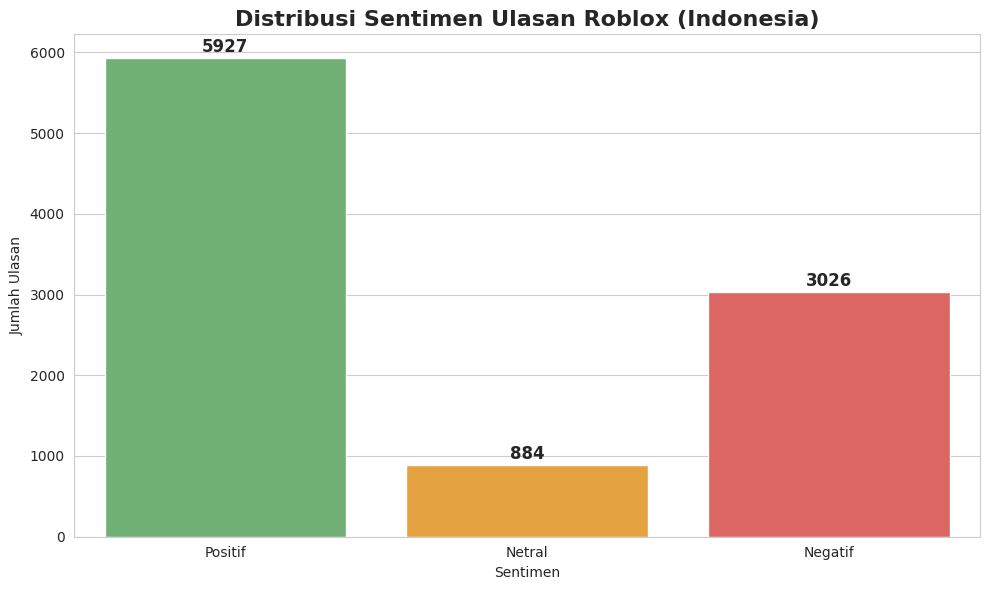


WORDCLOUD BERDASARKAN SENTIMEN (setelah filter konteks)


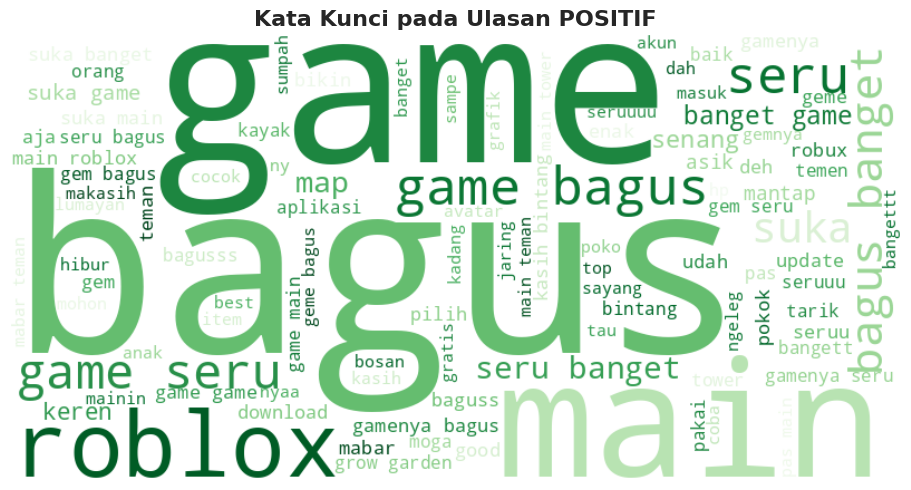

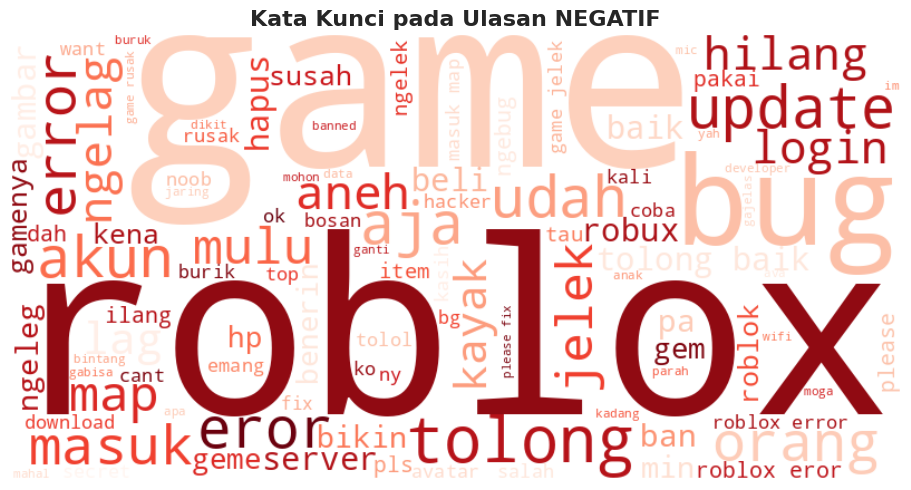

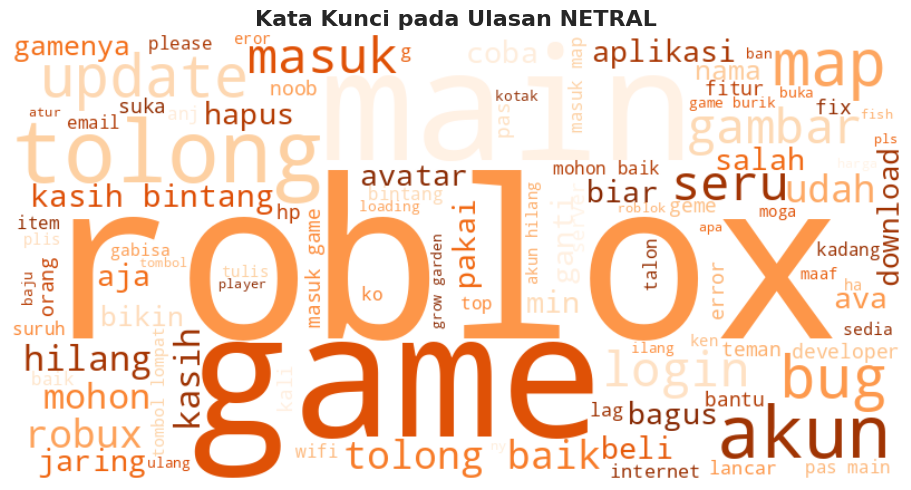


TOP 10 KATA TERATAS PER SENTIMEN
POSITIF:
  • game: 2312
  • bagus: 2143
  • seru: 1489
  • banget: 1123
  • main: 1011
  • roblox: 742
  • suka: 659
  • map: 278
  • gamenya: 252
  • teman: 213

NEGATIF:
  • roblox: 463
  • game: 428
  • bug: 148
  • tolong: 133
  • masuk: 99
  • eror: 98
  • update: 92
  • error: 89
  • akun: 82
  • baik: 77

NETRAL:
  • game: 290
  • roblox: 270
  • tolong: 238
  • main: 224
  • akun: 147
  • map: 112
  • masuk: 103
  • bug: 85
  • update: 81
  • baik: 79


In [32]:
# -*- coding: utf-8 -*-
"""## EVALUASI & VISUALISASI HASIL SENTIMEN (Versi: label 'neutral')"""

import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from collections import Counter
import numpy as np

# --- 0. Cek isi label yang ada ---
print("\n" + "="*60)
print("LABEL YANG TERDAPAT DI DATA")
print("="*60)
print(roblox_df['labels'].unique())

# --- 1. Ringkasan Distribusi Sentimen ---
print("\n" + "="*60)
print("RINGKASAN DISTRIBUSI SENTIMEN")
print("="*60)

sentiment_counts = roblox_df['labels'].value_counts()
total = len(roblox_df)

print(sentiment_counts)
print(f"\nTotal ulasan: {total}")
print(f"Positif: {sentiment_counts.get('positive', 0)} ({sentiment_counts.get('positive', 0)/total*100:.1f}%)")
print(f"Negatif: {sentiment_counts.get('negative', 0)} ({sentiment_counts.get('negative', 0)/total*100:.1f}%)")
print(f"Neutral: {sentiment_counts.get('neutral', 0)} ({sentiment_counts.get('neutral', 0)/total*100:.1f}%)\n")

# --- 2. Visualisasi Distribusi Sentimen ---
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

ax = sns.countplot(
    data=roblox_df,
    x='labels',
    order=['positive', 'neutral', 'negative'],  # label diseragamkan
    palette={'positive': '#66BB6A', 'neutral': '#FFA726', 'negative': '#EF5350'}
)

plt.title('Distribusi Sentimen Ulasan Roblox (Indonesia)', fontsize=16, fontweight='bold')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Ulasan')
plt.xticks(ticks=[0, 1, 2], labels=['Positif', 'Netral', 'Negatif'])

# Tambah label nilai di atas bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 8),
                textcoords='offset points', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# --- 3. Word Cloud per Sentimen ---
# --- 3. Word Cloud per Sentimen ---

def generate_wordcloud(text_data, title, color):
    if len(text_data) == 0:
        print(f"Tidak ada data untuk wordcloud: {title}")
        return
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap=color,
        max_words=100,
        contour_width=1,
        contour_color='steelblue'
    ).generate(text_data)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=16, fontweight='bold')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# ✅ Tambahkan daftar kata positif dan negatif
positive_keywords = ['bagus', 'seru', 'banget', 'suka', 'keren', 'main', 'lancar', 'asyik', 'menarik']
negative_keywords = ['bug', 'error', 'lag', 'jelek', 'buruk', 'crash', 'lemot', 'tolong', 'bosen']

# ✅ Fungsi filter konteks
def filter_context(df, sentiment, positive_words, negative_words):
    texts = []
    for text in df[df['labels'] == sentiment]['clean_content']:
        if sentiment == 'positive' and not any(neg in text for neg in negative_words):
            texts.append(text)
        elif sentiment == 'negative' and not any(pos in text for pos in positive_words):
            texts.append(text)
        elif sentiment == 'neutral':
            texts.append(text)
    return ' '.join(texts)

# ✅ Gunakan fungsi filter_context untuk gabungkan teks
pos_text = filter_context(roblox_df, 'positive', positive_keywords, negative_keywords)
neg_text = filter_context(roblox_df, 'negative', positive_keywords, negative_keywords)
neu_text = filter_context(roblox_df, 'neutral', positive_keywords, negative_keywords)

print("\n" + "="*60)
print("WORDCLOUD BERDASARKAN SENTIMEN (setelah filter konteks)")
print("="*60)

generate_wordcloud(pos_text, "Kata Kunci pada Ulasan POSITIF", "Greens")
generate_wordcloud(neg_text, "Kata Kunci pada Ulasan NEGATIF", "Reds")
generate_wordcloud(neu_text, "Kata Kunci pada Ulasan NETRAL", "Oranges")


# --- 4. Top 10 Kata Teratas per Sentimen ---
def get_top_words(text, n=10):
    if not text.strip():
        return []
    words = text.split()
    return Counter(words).most_common(n)

print("\n" + "="*60)
print("TOP 10 KATA TERATAS PER SENTIMEN")
print("="*60)

top_pos = get_top_words(pos_text, 10)
top_neg = get_top_words(neg_text, 10)
top_neu = get_top_words(neu_text, 10)

print("POSITIF:")
for word, freq in top_pos:
    print(f"  • {word}: {freq}")

print("\nNEGATIF:")
for word, freq in top_neg:
    print(f"  • {word}: {freq}")

print("\nNETRAL:")
for word, freq in top_neu:
    print(f"  • {word}: {freq}")


In [31]:
roblox_df.sample(20)

,content,clean_content,result,labels,score,adjusted_label,final_label
3163,game ini seru tapi mapnya semua gak bisa dimai...,game seru map dimainin tolong baik,"{'label': 'positive', 'score': 0.989797055721283}",positive,0.989797,positive,positive
7226,mantap baik,mantap,"{'label': 'positive', 'score': 0.9991832375526...",positive,0.999183,positive,positive
4141,ok,ok,"{'label': 'negative', 'score': 0.998392641544342}",negative,0.998393,negative,negative
5835,mantap,mantap,"{'label': 'positive', 'score': 0.9991832375526...",positive,0.999183,positive,positive
6287,"gamenya bagus banget banyak, minus nya cuma ya...",gamenya bagus banget minus laptop menang pojok...,"{'label': 'positive', 'score': 0.7345459461212...",positive,0.734546,positive,positive
718,sangat asik banget,asik banget,"{'label': 'positive', 'score': 0.9990027546882...",positive,0.999003,positive,positive
7749,seru dan asik bayak mainan,seru asik bayak main,"{'label': 'positive', 'score': 0.9976498484611...",positive,0.997650,positive,positive
1694,Bagus tapi jaringannya ngeleg terus,bagus jaring ngeleg,"{'label': 'negative', 'score': 0.998907208442688}",negative,0.998907,positive,positive
300,gameny cukup menghiburkn tetapi tolong untuk u...,gameny menghiburkn tolong updateny tidk ush te...,"{'label': 'neutral', 'score': 0.9567649364471436}",neutral,0.956765,neutral,neutral
5701,exciting,exciting,"{'label': 'negative', 'score': 0.9969220757484...",negative,0.996922,negative,negative



RINGKASAN NILAI CONFIDENCE SCORE
              score                                                    \
              count      mean       std       min       25%       50%   
final_label                                                             
negative     2540.0  0.940061  0.117744  0.398636  0.951700  0.995456   
neutral       683.0  0.893983  0.154393  0.375520  0.842242  0.982863   
positive     6614.0  0.967387  0.086445  0.378539  0.988247  0.997968   

                                 
                  75%       max  
final_label                      
negative     0.998723  0.999555  
neutral      0.996752  0.999169  
positive     0.998879  0.999501  


/tmp/ipython-input-1620690982.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Sentimen')


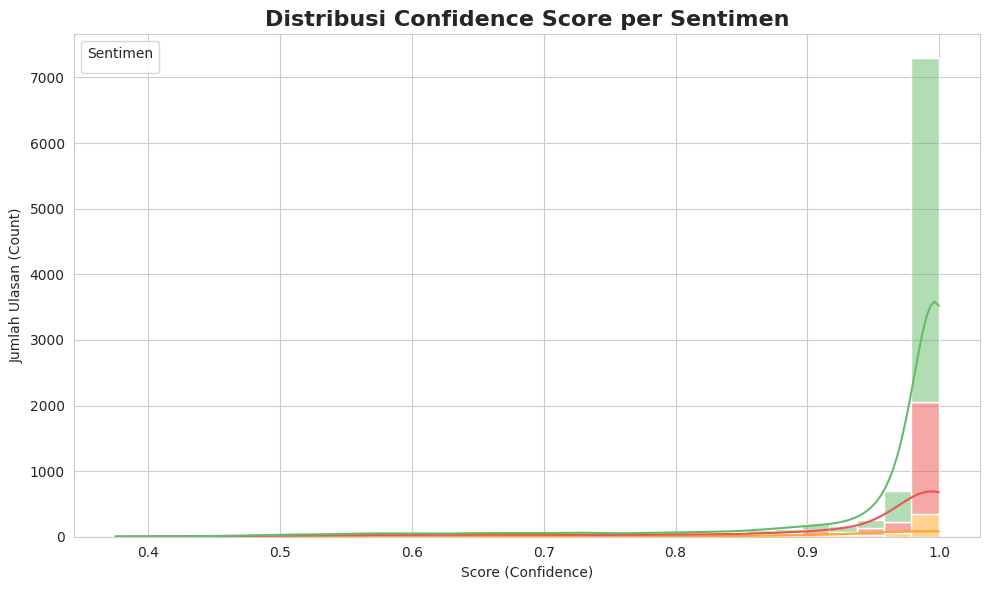

In [37]:
# -*- coding: utf-8 -*-
"""## Distribusi Confidence Score per Sentimen"""

import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Cek nilai skor ---
print("\n" + "="*60)
print("RINGKASAN NILAI CONFIDENCE SCORE")
print("="*60)
print(roblox_df[['final_label', 'score']].groupby('final_label').describe())

# --- 2. Histogram per sentimen ---
plt.figure(figsize=(10, 6))
sns.histplot(
    data=roblox_df,
    x='score',
    hue='final_label',
    bins=30,
    kde=True,
    multiple='stack',
    palette={'positive': '#66BB6A', 'negative': '#EF5350', 'neutral': '#FFA726'}
)
plt.title("Distribusi Confidence Score per Sentimen", fontsize=16, fontweight='bold')
plt.xlabel("Score (Confidence)")
plt.ylabel("Jumlah Ulasan (Count)")
plt.legend(title='Sentimen')
plt.tight_layout()
plt.show()
